2022~2024년 외식산업 경기동향
- https://kadx.co.kr/opmk/frn/pmumkproductDetail/PMU_8122fb95-72f3-4248-bc0a-31060000dc17/5#

In [ ]:
!pip install -Uq koreanize-matplotlib

In [ ]:
import pandas as pd
import numpy as np
import koreanize_matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import glob

In [ ]:
# prompt: data 디렉토리 아래에 있는 csv 파일들을 하나의 dataframe으로 생성하는 간략한 코드 작성

# data 디렉토리 아래의 모든 csv 파일 경로를 리스트로 가져옴
csv_files = glob.glob('data/*.csv')

# 빈 리스트를 생성하여 각 파일의 DataFrame을 저장
dfs = []

# 각 파일을 읽어 DataFrame으로 변환하고 리스트에 추가
for file in csv_files:
    try:
        df = pd.read_csv(file)
        dfs.append(df)
    except pd.errors.ParserError as e:  # 파일 파싱 오류 처리
        print(f"Error reading {file}: {e}")
    except Exception as e: # 기타 오류 처리
        print(f"An unexpected error occurred while reading {file}: {e}")

# 리스트에 있는 DataFrame들을 하나로 병합 (concat 사용)
if dfs: # 리스트가 비어있지 않을 경우에만 concat 수행
  df_foodsvc_trend = pd.concat(dfs, ignore_index=True)
  print(df_foodsvc_trend.head())
else:
  print("No CSV files found or all files encountered errors during reading.")

   조사연도  조사분기  구분         업종 지수항목      지수
0  2023     4  현재         전체  매출액   73.67
1  2023     4  현재         전체  식재료  141.92
2  2023     4  현재         전체   고용   95.77
3  2023     4  현재    한식 음식점업  매출액   71.58
4  2023     4  현재  한식 일반음식점업  매출액   71.25


In [ ]:
df.head()

,조사연도,조사분기,구분,업종,지수항목,지수
0,2024,3,현재,전체,매출액,76.04
1,2024,3,현재,전체,식재료,140.80
2,2024,3,현재,전체,고용,96.02
3,2024,3,현재,한식 음식점업,매출액,72.66
4,2024,3,현재,한식 일반음식점업,매출액,74.64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   조사연도    567 non-null    int64  
 1   조사분기    567 non-null    int64  
 2   구분      567 non-null    object 
 3   업종      567 non-null    object 
 4   지수항목    567 non-null    object 
 5   지수      567 non-null    float64
dtypes: float64(1), int64(2), object(3)
memory usage: 26.7+ KB


조사연도  조사분기
2022  1       76.680000
      2       89.219630
      3       93.034630
      4       88.807593
2023  1       86.495660
      2       88.607778
      3       83.429245
      4       79.336667
2024  1       80.472407
      2       81.747037
      3       80.281667
      4       84.308519
Name: 지수, dtype: float64

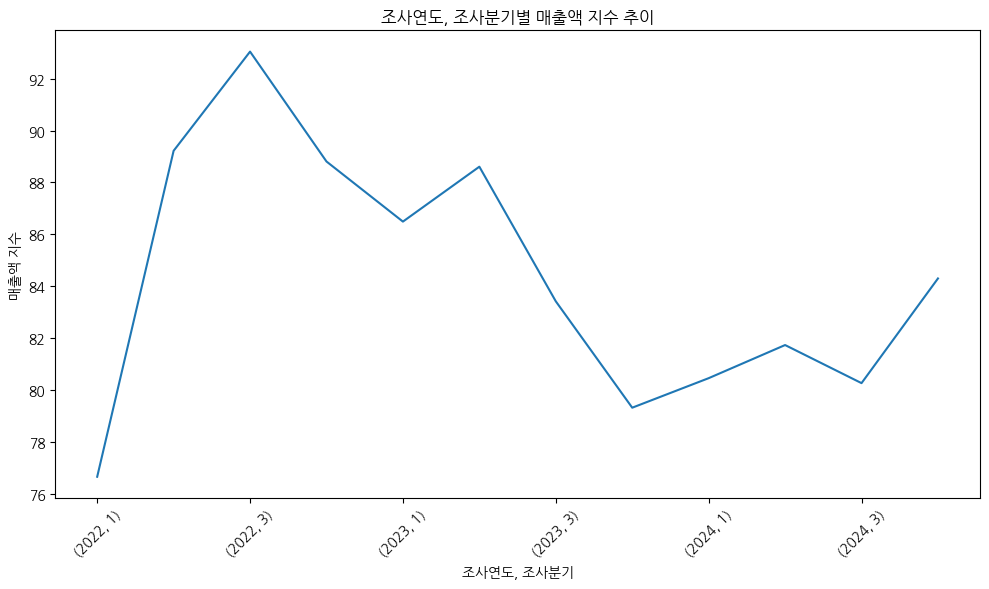

In [ ]:
# 조사연도, 조사분기별 매출액 지수 분석 (지수항목이 '매출액'인 경우만)
sales_trend = df_foodsvc_trend[df_foodsvc_trend['지수항목'] == '매출액'].groupby(['조사연도', '조사분기'])['지수'].mean()

display(sales_trend)

# matplotlib을 사용하여 시각화 (선택사항)
plt.figure(figsize=(10, 6))
sales_trend.plot()
plt.title('조사연도, 조사분기별 매출액 지수 추이')
plt.xlabel('조사연도, 조사분기')
plt.ylabel('매출액 지수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
